In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'notebook'
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.express as px


In [22]:
from bokeh.io import output_file, show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.layouts import row, column, gridplot
output_notebook()
import pandas as pd
import numpy as np
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10
from bokeh.io import output_file
from bokeh.layouts import gridplot
from bokeh.layouts import row
from sklearn.preprocessing import StandardScaler
from bokeh.layouts import column
from bokeh.layouts import column, row
from sklearn.decomposition import PCA
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource

In [23]:
df = pd.read_csv("/content/Country_data2.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


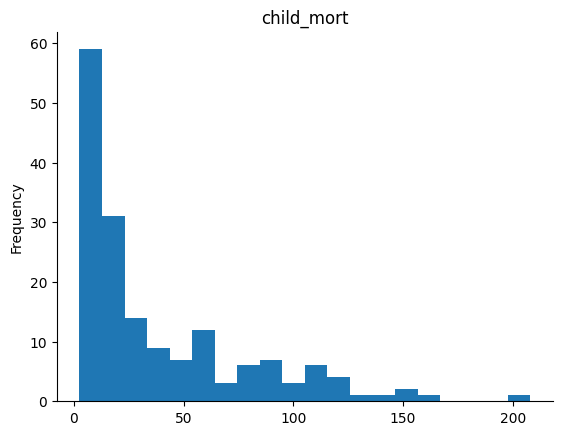

In [24]:
# @title child_mort

from matplotlib import pyplot as plt
df['child_mort'].plot(kind='hist', bins=20, title='child_mort')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
df.shape

(167, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [27]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781838,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570700,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [28]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['child_mort'] = df['health'] * df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,41.9174,55.30,7.58,248.297,1610,9.44,56.2,5.82,553
1,Albania,267.8950,1145.20,6.55,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,185.9820,1712.64,4.17,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,100.6050,2199.19,2.85,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,735.6600,5551.00,6.03,7185.800,19100,1.44,76.8,2.13,12200


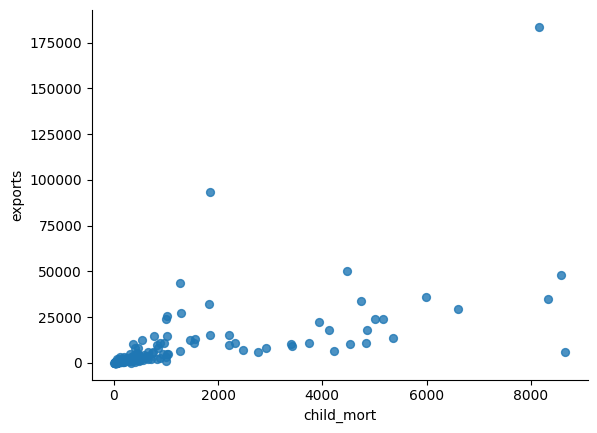

In [29]:
# @title child_mort vs exports

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='child_mort', y='exports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

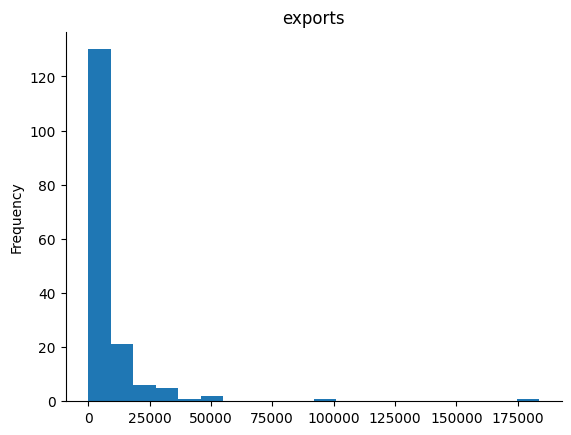

In [30]:
# @title exports

from matplotlib import pyplot as plt
df['exports'].plot(kind='hist', bins=20, title='exports')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [31]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [32]:


# Create a histogram plot
p = figure(title='Child Mortality Histogram', x_axis_label='Child Mortality', y_axis_label='Frequency')

# Convert dataframe column to a list
hist, edges = np.histogram(df['child_mort'], bins=20)

# Add histogram bars
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color='white', fill_color='navy', alpha=0.5)

# Remove spines
p.outline_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.axis_line_color = None
p.yaxis.axis_line_color = None


show(p)


In [33]:
p = figure(title='Exports Histogram', x_axis_label='Exports', y_axis_label='Frequency')

# Convert dataframe column to a list
hist, edges = np.histogram(df['exports'], bins=20)

# Add histogram bars
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color='white', fill_color='navy', alpha=0.5)

# Remove spines
p.outline_line_color = None
p.ygrid.grid_line_color = None
p.xaxis.axis_line_color = None
p.yaxis.axis_line_color = None


show(p)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [35]:
plot=figure(title="Child Mortality vs life expectancy",x_axis_label="Life expectancy",y_axis_label="Child Mortality")
plot.scatter(df["child_mort"],df["life_expec"], size=7, color="navy", alpha=0.5)
show(plot)

In [36]:
plot=figure(title="Income Vs Exports",x_axis_label="Income",y_axis_label="Exports")
plot.scatter(df["income"],df["exports"], size=7, color="navy", alpha=0.5)
show(plot)

In [37]:
plot=figure(title="Imports Vs Exports",x_axis_label="Imports",y_axis_label="exports")
plot.scatter(df["imports"],df["exports"], size=7, color="navy", alpha=0.5)
show(plot)

In [38]:
plot=figure(title="gdp Vs health",x_axis_label="gdp",y_axis_label="health")
plot.scatter(df["gdpp"],df["health"], size=7, color="navy", alpha=0.5)
show(plot)

In [39]:
plot=figure(title="gdp Vs exports",x_axis_label="gdp",y_axis_label="exports")
plot.scatter(df["gdpp"],df["exports"], size=7, color="navy", alpha=0.5)
show(plot)

In [40]:
plot=figure(title="gdp Vs imports",x_axis_label="gdp",y_axis_label="imports")
plot.scatter(df["gdpp"],df["imports"], size=7, color="navy", alpha=0.5)
show(plot)

In [41]:
plot=figure(title="inflation Vs income",x_axis_label="inflation",y_axis_label="income")
plot.scatter(df["inflation"],df["income"], size=7, color="navy", alpha=0.5)
show(plot)

In [42]:
plot=figure(title="Life expectancy Vs income",x_axis_label="Life expectancy",y_axis_label="income")
plot.scatter(df["life_expec"],df["income"], size=7, color="navy", alpha=0.5)
show(plot)

In [43]:
plot=figure(title="Life expectancy Vs health",x_axis_label="Life expectancy",y_axis_label="health")
plot.scatter(df["life_expec"],df["health"], size=7, color="navy", alpha=0.5)
show(plot)

In [63]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['exports']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Exports", x_range=['exports'], width=400, height=500)

# Stems
p.segment(['exports'], upper, ['exports'], q3, line_color="black")
p.segment(['exports'], lower, ['exports'], q1, line_color="black")

# Boxes
p.vbar(['exports'], 0.7, q2, q3, line_color="black")
p.vbar(['exports'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['exports'], lower, 0.2, (qmin - lower) / 500, line_color="black")
p.rect(['exports'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['exports'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [64]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['child_mort']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Child Mortality", x_range=['child_mort'], width=400, height=500)

# Stems
p.segment(['child_mort'], upper, ['child_mort'], q3, line_color="black")
p.segment(['child_mort'], lower, ['child_mort'], q1, line_color="black")

# Boxes
p.vbar(['child_mort'], 0.7, q2, q3, line_color="black")
p.vbar(['child_mort'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['child_mort'], lower, 0.2, (qmin - lower) / 500, line_color="black")
p.rect(['child_mort'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['child_mort'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [65]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['health']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Health", x_range=['health'], width=400, height=500)

# Stems
p.segment(['health'], upper, ['health'], q3, line_color="black")
p.segment(['health'], lower, ['health'], q1, line_color="black")

# Boxes
p.vbar(['health'], 0.7, q2, q3, line_color="black")
p.vbar(['health'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['health'], lower, 0.2, (qmin - lower) / 500, line_color="black")
p.rect(['health'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['health'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [66]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['imports']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Imports", x_range=['imports'], width=400, height=500)

# Stems
p.segment(['imports'], upper, ['imports'], q3, line_color="black")
p.segment(['imports'], lower, ['imports'], q1, line_color="black")

# Boxes
p.vbar(['imports'], 0.7, q2, q3, line_color="black")
p.vbar(['imports'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['imports'], lower, 0.2, (qmin - lower) / 500, line_color="black")
p.rect(['imports'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['imports'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [67]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['income']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Income", x_range=['income'], width=400, height=500)

# Stems
p.segment(['income'], upper, ['income'], q3, line_color="black")
p.segment(['income'], lower, ['income'], q1, line_color="black")

# Boxes
p.vbar(['income'], 0.7, q2, q3, line_color="black")
p.vbar(['income'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['income'], lower, 0.2, (qmin - lower) / 500, line_color="black")
p.rect(['income'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['income'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [68]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['inflation']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Inflation", x_range=['inflation'], width=400, height=500)

# Stems
p.segment(['inflation'], upper, ['inflation'], q3, line_color="black")
p.segment(['inflation'], lower, ['inflation'], q1, line_color="black")

# Boxes
p.vbar(['inflation'], 0.7, q2, q3, line_color="black")
p.vbar(['inflation'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['inflation'], lower, 0.2, (qmin - lower) / 500, line_color="black")
p.rect(['inflation'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['inflation'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [69]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['life_expec']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of Life Expentency", x_range=['life_expec'], width=400, height=500)

# Stems
p.segment(['life_expec'], upper, ['life_expec'], q3, line_color="black")
p.segment(['life_expec'], lower, ['life_expec'], q1, line_color="black")

# Boxes
p.vbar(['life_expec'], 0.7, q2, q3, line_color="black")
p.vbar(['life_expec'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['life_expec'], lower, 0.2, (lower - qmin) / 500, line_color="black")
p.rect(['life_expec'], upper, 0.2, (upper-qmax) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['life_expec'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [71]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['total_fer']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot og Total Fertility", x_range=['total_fer'], width=400, height=500)

# Stems
p.segment(['total_fer'], upper, ['total_fer'], q3, line_color="black")
p.segment(['total_fer'], lower, ['total_fer'], q1, line_color="black")

# Boxes
p.vbar(['total_fer'], 0.7, q2, q3, line_color="black")
p.vbar(['total_fer'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['total_fer'], lower, 0.2, (qmin-lower) / 500, line_color="black")
p.rect(['total_fer'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['total_fer'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [70]:
# Assuming 'child_mort' is the series for which you want to create the box plot
series = df['gdpp']

# Calculate quartiles, IQR, upper and lower bounds for outliers, and mean
qmin, q1, q2, q3, qmax = series.quantile([0, 0.25, 0.5, 0.75, 1])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
mean = series.mean()

# Identify outliers
out = series[(series > upper) | (series < lower)]

if not out.empty:
    outlier = list(out.values)

# Create a figure
p = figure(title="Boxplot of GDP", x_range=['gdpp'], width=400, height=500)

# Stems
p.segment(['gdpp'], upper, ['gdpp'], q3, line_color="black")
p.segment(['gdpp'], lower, ['gdpp'], q1, line_color="black")

# Boxes
p.vbar(['gdpp'], 0.7, q2, q3, line_color="black")
p.vbar(['gdpp'], 0.7, q1, q2, line_color="black")

# Whiskers
p.rect(['gdpp'], lower, 0.2, (qmin-lower) / 500, line_color="black")
p.rect(['gdpp'], upper, 0.2, (qmax-upper) / 500, line_color="black")

# Outliers
if not out.empty:
    p.circle(['gdpp'] * len(outlier), outlier, size=6, fill_alpha=0.6)

# Remove x-axis ticks and labels
p.xaxis.major_tick_line_color = None
p.xaxis.minor_tick_line_color = None
p.xaxis.major_label_text_color = None

# Show the plot
show(p)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.pipeline import make_pipeline

In [54]:
df1 = df.copy()
df1.drop(columns = ["country"], inplace = True)
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,41.9174,55.30,7.58,248.297,1610,9.44,56.2,5.82,553
1,267.8950,1145.20,6.55,1987.740,9930,4.49,76.3,1.65,4090
2,185.9820,1712.64,4.17,1400.440,12900,16.10,76.5,2.89,4460
3,100.6050,2199.19,2.85,1514.370,5900,22.40,60.1,6.16,3530
4,735.6600,5551.00,6.03,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,155.9250,1384.02,5.25,1565.190,2950,2.62,63.0,3.50,2970
163,662.8500,3847.50,4.91,2376.000,16500,45.90,75.4,2.47,13500
164,89.6040,943.20,6.84,1050.620,4490,12.10,73.1,1.95,1310
165,67.8580,393.00,5.18,450.640,4480,23.60,67.5,4.67,1310


In [55]:
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

In [56]:
pca = PCA().fit(scaled_df1)

In [57]:
pca.explained_variance_ratio_

array([5.50779410e-01, 1.50015510e-01, 1.18736984e-01, 8.96330307e-02,
       4.58278431e-02, 2.43643868e-02, 1.87111005e-02, 1.44143976e-03,
       4.90295345e-04])

In [58]:
import numpy as np

from bokeh.plotting import figure, show

# Create a figure object
p = figure(title='Cumulative Explained Variance Ratio',
           x_axis_label='Number of Components',
           y_axis_label='Cumulative Explained Variance',
           width=600,
           height=400)

# Calculate the cumulative sum of explained variance ratios
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio using a list of values
p.line(list(range(1, len(explained_variance_ratio_cumsum) + 1)), explained_variance_ratio_cumsum, line_width=2)

# Show the plot
show(p)

In [59]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Assuming pca.explained_variance_ratio_ is a NumPy array
explained_variance_ratio = pca.explained_variance_ratio_

# Create a Bokeh figure
p = figure(title='Scree Plot for PCA',
           x_axis_label='Principal Component',
           y_axis_label='Explained Variance Ratio',
           width=800,
           height=500)

# Plot the explained variance ratio
p.circle(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, size=10, color='navy', alpha=0.5)

# Customize axis labels and title
p.xaxis.axis_label_text_font_size = '14pt'
p.xaxis.axis_label_text_color = 'red'
p.yaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_color = 'red'
p.title.text_font_size = '16pt'
p.title.text_color = 'green'

# Set y-axis ticks
p.yaxis.ticker = np.arange(0, 0.6, 0.1)

# Add grid lines
p.grid.grid_line_color = 'black'
p.grid.grid_line_alpha = 0.3

# Show the plot
output_notebook()
show(p)


In [60]:
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(df1)
pca1 = PCA(4).fit_transform(scaled_df2)

In [61]:
pca1.shape

(167, 4)

In [62]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Assuming pca_data is the transformed data after PCA
# It should have shape (n_samples, 4) for 4 principal components

# Create a list of pairs of components for plotting
components_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create subplots for each pair of components
for i, (comp1, comp2) in enumerate(components_pairs):
    # Transform the data using the PCA object
    x = pca.transform(scaled_df2)[:, comp1]
    y = pca.transform(scaled_df2)[:, comp2]

    # Create a Bokeh figure
    p = figure(title=f'Principal Component {comp1+1} vs Principal Component {comp2+1}', x_axis_label=f'PC {comp1+1}', y_axis_label=f'PC {comp2+1}', width=400,
               height=400)

    # Plot the data points
    p.circle(x, y, size=8, color='navy', alpha=0.5)

    # Add grid lines
    p.grid.grid_line_color = 'black'
    p.grid.grid_line_alpha = 0.3


    show(p)